# HW 2

Group Member: Wo Long(wl2834), Zhiyuan Li(zl3362)

## Q1

Analytically solve for $\mu_x$ and $\sigma_x$:
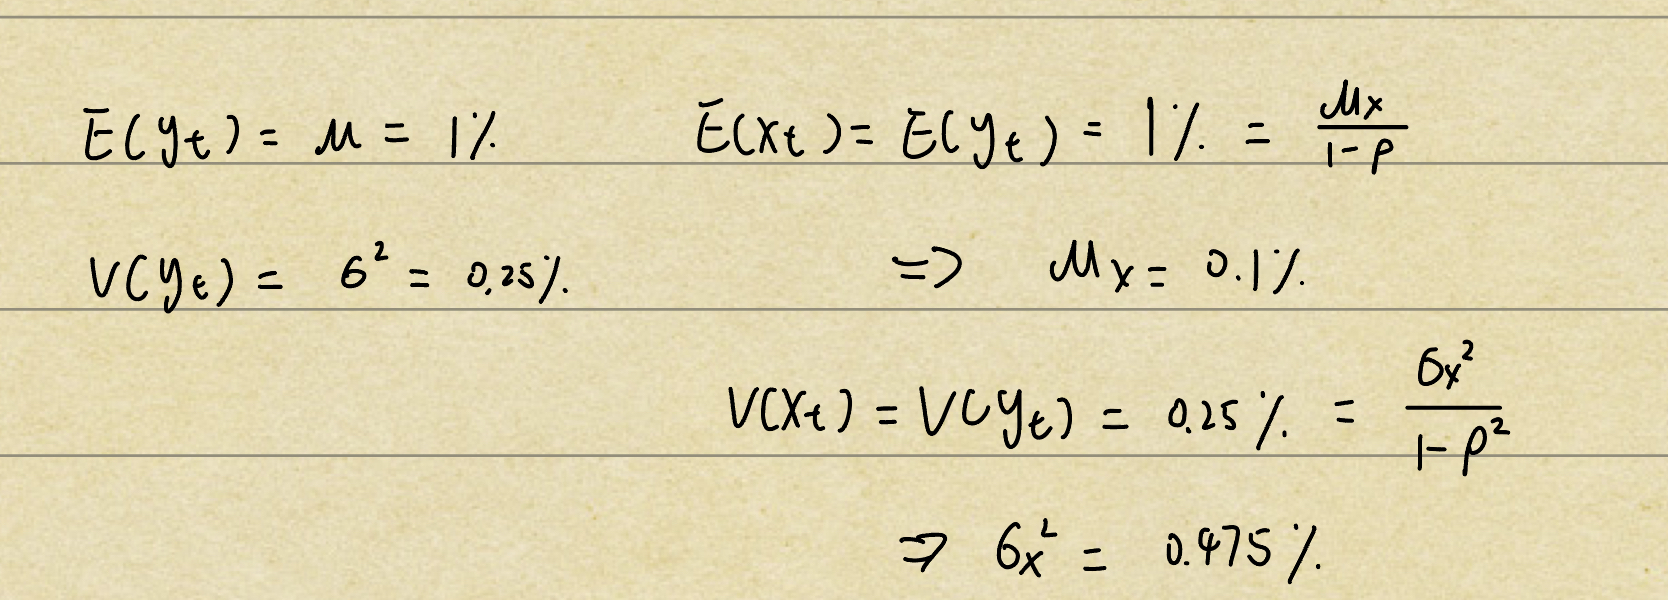

In [66]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.optimize import fsolve
import statsmodels.api as sm


In [2]:
mu = 0.01
sigma = 0.05
rho = 0.9

mu_x = mu * (1 - rho)
sigma_x = np.sqrt(sigma**2 * (1 - rho**2))
e_x = mu_x / (1 - rho)
var_x = sigma_x**2 / (1 - rho**2)

In [56]:
print(mu_x,sigma_x,e_x,var_x)

0.0009999999999999998 0.021794494717703367 0.01 0.0025000000000000005


#### 1.1

In [9]:

# Function to simulate an autoregressive (AR) process
def sim_AR(t):
    eps = norm.rvs(size=t)
    x = np.zeros(t)
    x[0] = norm.rvs(loc=e_x, scale=np.sqrt(var_x))
    for i in range(1, t):
        x[i] = rho*x[i-1] + mu_x + sigma_x*eps[i]
    return x

# Function to simulate a standard normal process
def sim_sd(t):
    eps = norm.rvs(size=t)
    y = mu + sigma*eps
    return y

# Simulation loop
t = 100
n = 1000
sim_ar_results = np.zeros((n, t))
sim_std_results = np.zeros((n, t))

np.random.seed(2024)

for i in range(n):
    sim_ar_results[i, :] = sim_AR(t)
    sim_std_results[i, :] = sim_sd(t)

# Calculating the mean and standard deviation of the simulation results
mean_ar = np.mean(sim_ar_results, axis=1)
mean_std = np.mean(sim_std_results, axis=1)
sd_ar = np.std(sim_ar_results, axis=1)
sd_std = np.std(sim_std_results, axis=1)




In [12]:
print("AR Model Sample Mean :", mean_ar.mean())
print("Standard Sample Model Mean  :", mean_std.mean())
print("AR Model Sample Std Dev  :", sd_ar.mean())
print("Standard Sample Model Std Dev  :", sd_std.mean())

AR Model Sample Mean : 0.010552314259291803
Standard Sample Model Mean  : 0.010121630061654466
AR Model Sample Std Dev  : 0.044730769168992705
Standard Sample Model Std Dev  : 0.04968588190920613


In [13]:
print("AR Model Sample Mean's STD :", mean_ar.std())
print("Standard Sample Model Mean's STD  :", mean_std.std())
print("AR Model Sample Std Dev's STD  :", sd_ar.std())
print("Standard Sample Model Std Dev's STD  :", sd_std.std())

AR Model Sample Mean's STD : 0.021113628498853787
Standard Sample Model Mean's STD  : 0.004880473399174544
AR Model Sample Std Dev's STD  : 0.009185460687715119
Standard Sample Model Std Dev's STD  : 0.003574055283175134


#### 1.2

In [48]:
mean_ar = np.mean(sim_ar_results, axis=1)
mean_std = np.mean(sim_std_results, axis=1)
sd_ar = np.std(sim_ar_results, axis=1)
sd_std = np.std(sim_std_results, axis=1)

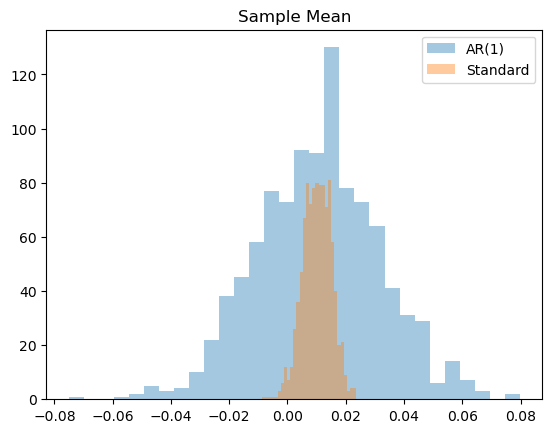

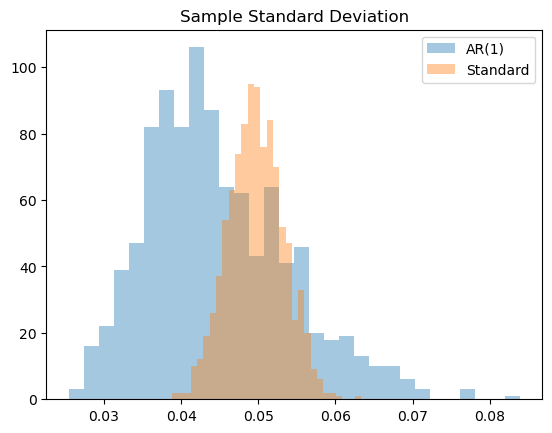

In [49]:
plt.hist(mean_ar, bins=30, alpha=0.4, label='AR(1)')
plt.hist(mean_std, bins=30, alpha=0.4, label='Standard')
plt.title('Sample Mean')
plt.legend()
plt.show()

# Histogram for Sample Standard Deviation
plt.hist(sd_ar, bins=30, alpha=0.4, label='AR(1)')
plt.hist(sd_std, bins=30, alpha=0.4, label='Standard')
plt.title('Sample Standard Deviation')
plt.legend()
plt.show()

In [51]:
# sample mean and std for the AR(1) model sample mean
mean_ar_mean = np.mean(mean_ar)
sd_ar_mean = np.std(mean_ar)

# sample mean and std for the standard model sample mean
mean_std_mean = np.mean(mean_std)
sd_std_mean = np.std(mean_std)

#  sample mean and std for the AR(1) model sample standard deviation
mean_ar_sd = np.mean(sd_ar)
sd_ar_sd = np.std(sd_ar)

#  sample mean and std for the standard model sample standard deviation
mean_std_sd = np.mean(sd_std)
sd_std_sd = np.std(sd_std)

# Printing the summary table
summary_table = [
    {"name": "AR(1) Model Mean", "mean": mean_ar_mean, "sd": sd_ar_mean},
    {"name": "Standard Model Mean", "mean": mean_std_mean, "sd": sd_std_mean},
    {"name": "AR(1) Model SD", "mean": mean_ar_sd, "sd": sd_ar_sd},
    {"name": "Standard Model SD", "mean": mean_std_sd, "sd": sd_std_sd}
]

# Display the summary
for item in summary_table:
    print(f"{item['name']}: Mean = {item['mean']}, SD = {item['sd']}")


AR(1) Model Mean: Mean = 0.010552314259291803, SD = 0.021113628498853787
Standard Model Mean: Mean = 0.010121630061654466, SD = 0.004880473399174544
AR(1) Model SD: Mean = 0.044730769168992705, SD = 0.009185460687715119
Standard Model SD: Mean = 0.04968588190920613, SD = 0.003574055283175134


The two models do not have similar sampling uncertainty

#### 1.3

In [54]:
mean_ar = np.mean(sim_ar_results, axis=1)
mean_std = np.mean(sim_std_results, axis=1)
sd_ar = np.std(sim_ar_results, axis=1)
sd_std = np.std(sim_std_results, axis=1)

skewness_ar_mean = skew(mean_ar) 
kurtosis_ar_mean = kurtosis(mean_ar) + 3

skewness_std_mean = skew(mean_std)
kurtosis_std_mean = kurtosis(mean_std)+ 3

skewness_ar_sd = skew(sd_ar)
kurtosis_ar_sd = kurtosis(sd_ar)+ 3

skewness_std_sd = skew(sd_std)
kurtosis_std_sd = kurtosis(sd_std)+ 3

summary_table_skew_kurtosis = [
    {"name": "AR(1) Model Mean", "skewness": skewness_ar_mean, "kurtosis": kurtosis_ar_mean},
    {"name": "Standard Model Mean", "skewness": skewness_std_mean, "kurtosis": kurtosis_std_mean},
    {"name": "AR(1) Model SD", "skewness": skewness_ar_sd, "kurtosis": kurtosis_ar_sd},
    {"name": "Standard Model SD", "skewness": skewness_std_sd, "kurtosis": kurtosis_std_sd}
]

for item in summary_table_skew_kurtosis:
    print(f"{item['name']}: Skewness = {item['skewness']},   Kurtosis = {item['kurtosis']}")


AR(1) Model Mean: Skewness = -0.04018267313263935,   Kurtosis = 3.243196314665802
Standard Model Mean: Skewness = -0.21486058064752658,   Kurtosis = 3.0894251996119504
AR(1) Model SD: Skewness = 0.6737239512780734,   Kurtosis = 3.3361464247385353
Standard Model SD: Skewness = 0.06488597804277839,   Kurtosis = 2.963739754270543


AR(1) has higher skewness and kurtosis for Standard deviation. 

#### 1.4

- The AR model have higher uncertainty for sample mean and variance estimation. 
- The autocorrelation slow down the convergence rate and require a larger sample size to converge.
- The distribution of the standard devaition is less normal and right skewed compared to the standard model.
- Intuitively, given the above observation, we can assume that the convergence rate of a AR(p) process decrease with p increase. Since the process would become more persistence and rely too much on the previous steps.

## Q2

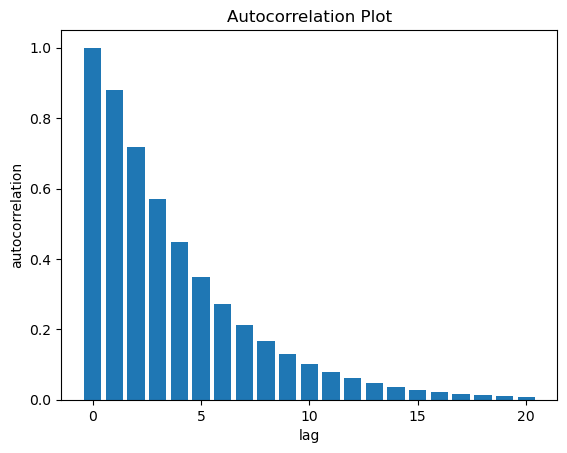

In [59]:
def acf2(p1, p2, t):
    cor = [1.0] + [0.0] * t
    cor[1] = p1 / (1 - p2)
    
    for i in range(2, t + 1):
        cor[i] = p1 * cor[i - 1] + p2 * cor[i - 2]
        
    return cor

acf_results = acf2(1.1, -0.25, 20)
plt.bar(range(0, 21), acf_results)
plt.title('Autocorrelation Plot')
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.show()


#### 2.2

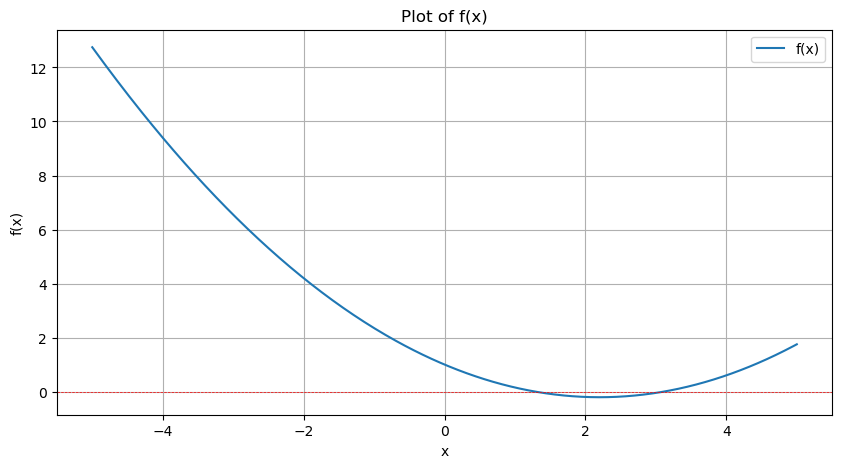

The first root is approximately: 1.2835
The second root is approximately: 3.1165


In [61]:
def f(x):
    
    return 1 - 1.1 * x + 0.25 * x ** 2

x_values = np.linspace(-5, 5, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label = 'f(x)')
plt.axhline(0, color = 'red', lw = 0.5, ls = '--')
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

root1 = fsolve(f, -2.5)
root2 = fsolve(f, 2.5)

print(f'The first root is approximately: {root1[0]:.4f}')
print(f'The second root is approximately: {root2[0]:.4f}')


The process is stationary. Because the 2 roots lie outside the unit circle calculated by the formula.

#### 2.3

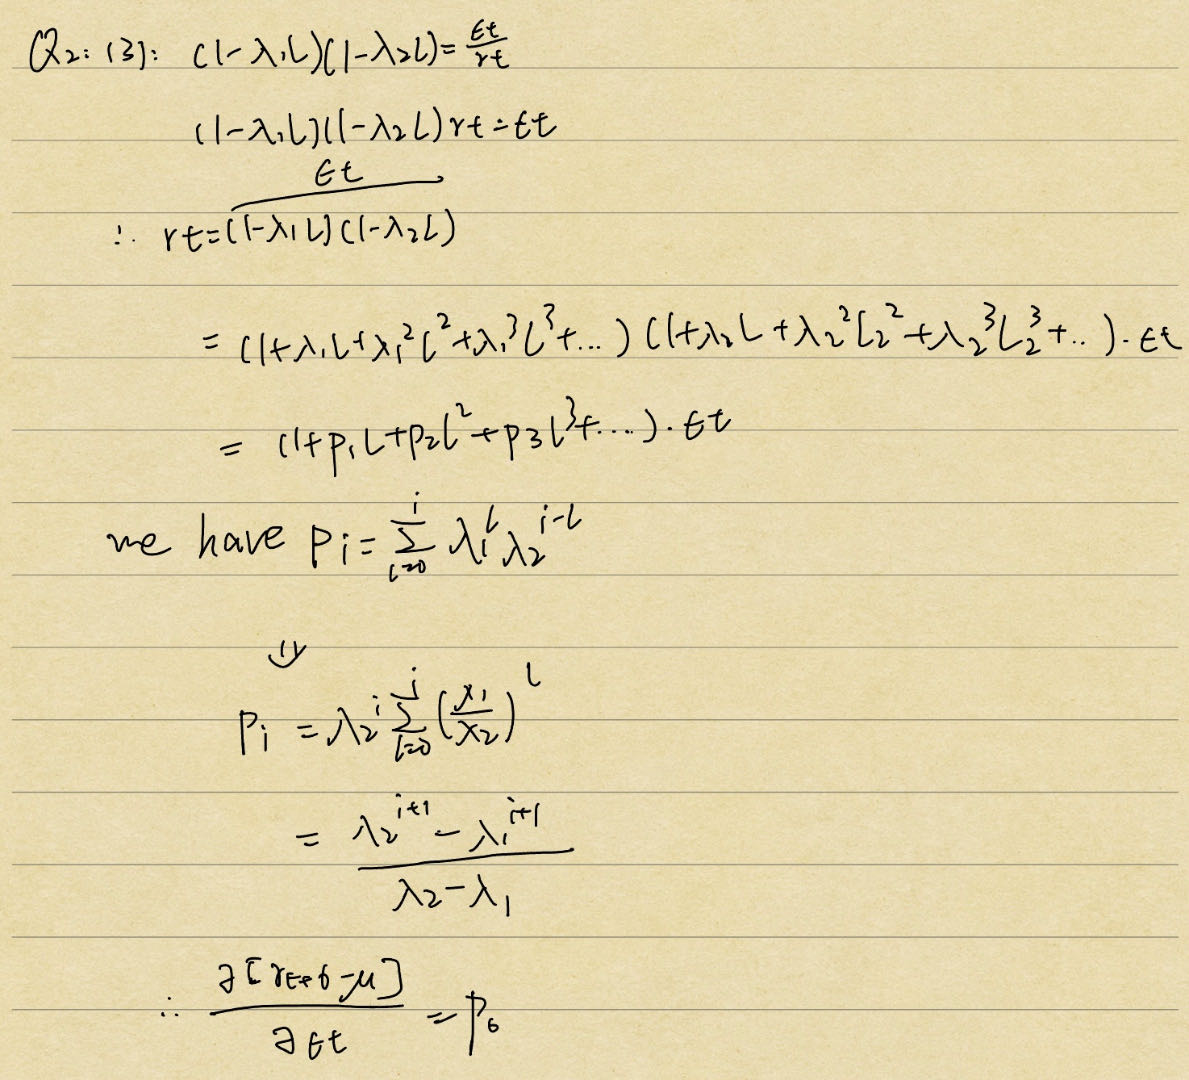

In [67]:
l2 = 1 / 1.2835
l1 = 1 / 3.1165
p6 = ((l2) ** 7 - (l1) ** 7) / (l2 - l1)

print(p6)

0.3795384755502833


#### 2.4

In [63]:
def g(x):
    
    return 1 - 0.9 * x - 0.8 * x ** 2

roots = fsolve(g, [-5, 5])

l2 = 1 / roots[0]
l1 = 1 / roots[1]

stationary = all(abs(root) > 1 for root in roots)

if not stationary:
    p6 = ((l2) ** 7 - (l1) ** 7) / (l2 - l1)
else:
    p6 = None

print(f'Roots: {roots}')
print(f'Stationary: {stationary}')
print(f'Dynamic Multiplier: {p6}')


Roots: [-1.81406152  0.68906152]
Stationary: False
Dynamic Multiplier: 6.778240999721804


The process is not stationary. Because the absolute value of roots are not greater than 1 for the 2 roots.

#### 2.5

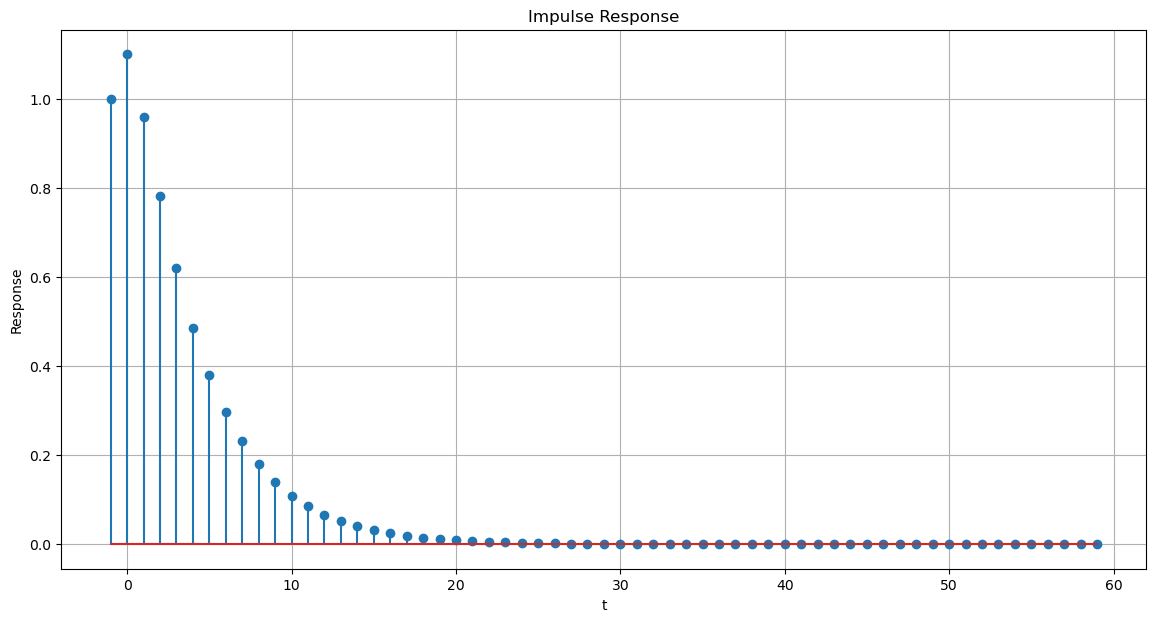

In [65]:
def sim_ar(p1, p2, t):
    t = t + 3
    x = np.zeros(t)
    x[2] = 1
    
    for i in range(3, t):
        x[i] = p1 * x[i - 1] + p2 * x[i - 2]
        
    return x

simulation_results = sim_ar(1.1, -0.25, 60)

plt.figure(figsize = (14, 7))
plt.stem(range(-1, 60), simulation_results[2:])
plt.title('Impulse Response')
plt.xlabel('t')
plt.ylabel('Response')
plt.grid(True)
plt.show()

## Q3

#### 3.1

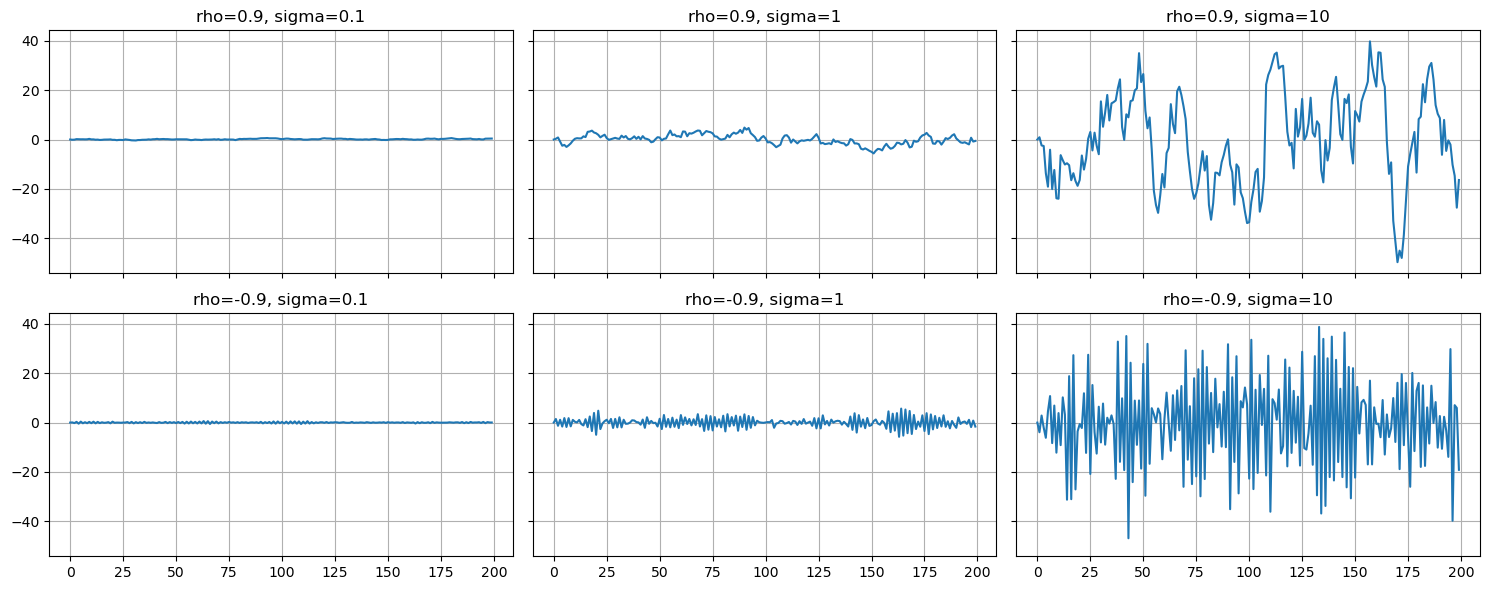

In [58]:
mu = 0.01
rho_values = [0.9, -0.9]
sigma_values = [0.1, 1, 10]
T = 200  

def generate_ar1_process(mu, rho, sigma, T):
    epsilon = np.random.normal(0, sigma, T)
    r = np.zeros(T)
    for t in range(1, T):
        r[t] = mu + rho * r[t-1] + epsilon[t]
    return r

fig, axs = plt.subplots(len(rho_values), len(sigma_values), figsize=(15, 6), sharex=True, sharey=True)

for i, rho in enumerate(rho_values):
    for j, sigma in enumerate(sigma_values):
        r = generate_ar1_process(mu, rho, sigma, T)
        axs[i, j].plot(r)
        axs[i, j].set_title(f'rho={rho}, sigma={sigma}')
        axs[i, j].grid(True)

plt.tight_layout()
plt.show()


#### 3.2 and 3.3

The asymptotic Standard Error is calculated as asymp. $SE(\hat{\rho}_j) = \sqrt{\frac{1 - \hat{\rho}_j^2}{T}}$


In [72]:
def get_asymp(rho_hat, T):
    return np.sqrt((1 - rho_hat**2) / T)

def generate_ar1_process(mu, rho, sigma, T):
    epsilon = np.random.normal(0, sigma, T)
    r = np.zeros(T)
    for t in range(1, T):
        r[t] = mu + rho * r[t-1] + epsilon[t]
    return r

def acf(r_t, n_lags, T):
    coefficients = []
    ols_se = []
    asymp_se = []
    for lag in range(1, n_lags + 1):
        r_t_lagged = np.roll(r_t, lag)[lag:]
        r_t_aligned = r_t[lag:]
        X = sm.add_constant(r_t_lagged)
        model = sm.OLS(r_t_aligned, X).fit()
        coefficients.append(model.params[1])
        ols_se.append(model.bse[1])
        asymp_se.append(get_asymp(model.params[1], T-lag))  # Adjust T for the effective sample size
    return coefficients, ols_se, asymp_se

/var/folders/9k/6cxzhzks2dz55thdfdgpdj2w0000gn/T/ipykernel_88281/3682757368.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((1 - rho_hat**2) / T)


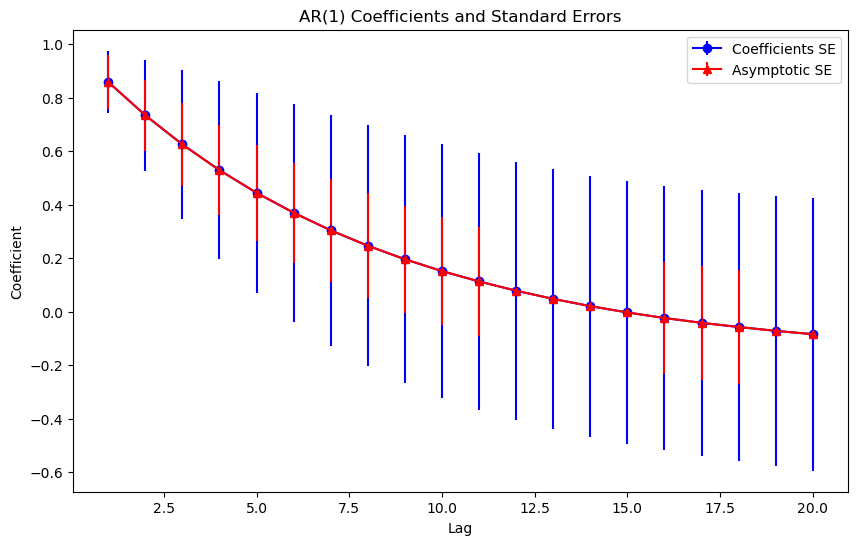

In [87]:
N_simulations = 10000
T = 100
mu = 0.01
rho = 0.9
sigma = 1
n_lags = 20

results = {'coefficients': np.zeros((N_simulations, n_lags)),
           'ols_se': np.zeros((N_simulations, n_lags)),
           'asymp_se': np.zeros((N_simulations, n_lags))}

for i in range(N_simulations):
    r_t = generate_ar1_process(mu, rho, sigma,  T)
    coefficients, ols_se, asymp_se = acf(r_t, n_lags,  T)
    results['coefficients'][i, :] = coefficients
    results['ols_se'][i, :] = ols_se
    results['asymp_se'][i, :] = asymp_se

coefficients_mean = np.mean(results['coefficients'], axis=0)
coefficients_se = np.std(results['coefficients'], axis=0)
ols_se_mean = np.mean(results['ols_se'], axis=0)
asymp_se_mean = np.mean(results['asymp_se'], axis=0)

# Visualization
x_values = np.arange(1, n_lags + 1)
plt.figure(figsize=(10, 6))
plt.errorbar(x_values, coefficients_mean, yerr=2*coefficients_se, label='Coefficients SE', fmt='-o', color='blue')
plt.errorbar(x_values, coefficients_mean, yerr=2*asymp_se_mean, label='Asymptotic SE', fmt='-^', color='red')
plt.title('AR(1) Coefficients and Standard Errors')
plt.xlabel('Lag')
plt.ylabel('Coefficient')
plt.legend()
plt.show()


In [88]:
estimated_ro = coefficients_mean[1]
estimated_ols_se = ols_se_mean[1]
estimated_sample_se = coefficients_se[1]
ro = 0.9

variables = {
    "estimated_ro": estimated_ro,
    "true ro": ro,
    "estimated_ols_se": estimated_ols_se,
    "estimated_sample_se": estimated_sample_se,
    
}

for name, value in variables.items():
    print(f"{name}: {value}")

estimated_ro: 0.7342102404048132
true ro: 0.9
estimated_ols_se: 0.0691608590251453
estimated_sample_se: 0.1035036592687462


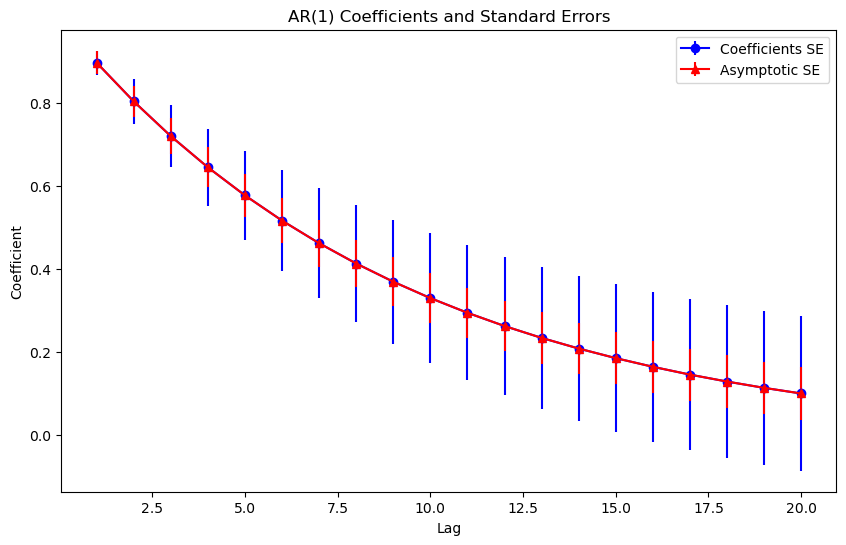

In [82]:
N_simulations = 10000
T = 1000
mu = 0.01
rho = 0.9
sigma = 1
n_lags = 20

results = {'coefficients': np.zeros((N_simulations, n_lags)),
           'ols_se': np.zeros((N_simulations, n_lags)),
           'asymp_se': np.zeros((N_simulations, n_lags))}

for i in range(N_simulations):
    r_t = generate_ar1_process(mu, rho, sigma,  T)
    coefficients, ols_se, asymp_se = acf(r_t, n_lags,  T)
    results['coefficients'][i, :] = coefficients
    results['ols_se'][i, :] = ols_se
    results['asymp_se'][i, :] = asymp_se

coefficients_mean = np.mean(results['coefficients'], axis=0)
coefficients_se = np.std(results['coefficients'], axis=0)
ols_se_mean = np.mean(results['ols_se'], axis=0)
asymp_se_mean = np.mean(results['asymp_se'], axis=0)

# Visualization
x_values = np.arange(1, n_lags + 1)
plt.figure(figsize=(10, 6))
plt.errorbar(x_values, coefficients_mean, yerr=2*coefficients_se, label='Coefficients SE', fmt='-o', color='blue')
plt.errorbar(x_values, coefficients_mean, yerr=2*asymp_se_mean, label='Asymptotic SE', fmt='-^', color='red')
plt.title('AR(1) Coefficients and Standard Errors')
plt.xlabel('Lag')
plt.ylabel('Coefficient')
plt.legend()
plt.show()


In [83]:
estimated_ro = coefficients_mean[1]
estimated_ols_se = ols_se_mean[1]
estimated_sample_se = coefficients_se[1]
ro = 0.9

variables = {
    "estimated_ro": estimated_ro,
    "true ro": ro,
    "estimated_ols_se": estimated_ols_se,
    "estimated_sample_se": estimated_sample_se
    
}

for name, value in variables.items():
    print(f"{name}: {value}")

estimated_ro: 0.803157617302437
true ro: 0.9
estimated_ols_se: 0.018874929213214778
estimated_sample_se: 0.02663204529841867


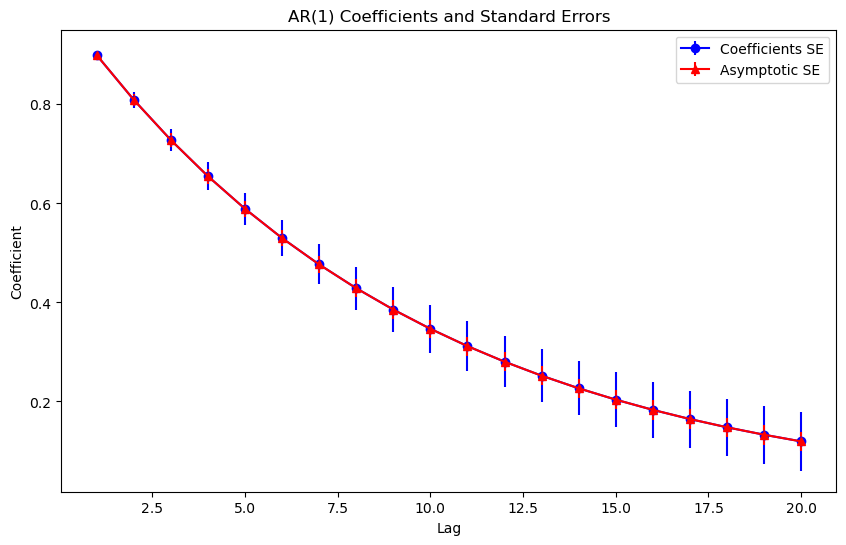

In [76]:
N_simulations = 10000
T = 10000
mu = 0.01
rho = 0.9
sigma = 1
n_lags = 20

results = {'coefficients': np.zeros((N_simulations, n_lags)),
           'ols_se': np.zeros((N_simulations, n_lags)),
           'asymp_se': np.zeros((N_simulations, n_lags))}

for i in range(N_simulations):
    r_t = generate_ar1_process(mu, rho, sigma,  T)
    coefficients, ols_se, asymp_se = acf(r_t, n_lags,  T)
    results['coefficients'][i, :] = coefficients
    results['ols_se'][i, :] = ols_se
    results['asymp_se'][i, :] = asymp_se

coefficients_mean = np.mean(results['coefficients'], axis=0)
coefficients_se = np.std(results['coefficients'], axis=0)
ols_se_mean = np.mean(results['ols_se'], axis=0)
asymp_se_mean = np.mean(results['asymp_se'], axis=0)

# Visualization
x_values = np.arange(1, n_lags + 1)
plt.figure(figsize=(10, 6))
plt.errorbar(x_values, coefficients_mean, yerr=2*coefficients_se, label='Coefficients SE', fmt='-o', color='blue')
plt.errorbar(x_values, coefficients_mean, yerr=2*asymp_se_mean, label='Asymptotic SE', fmt='-^', color='red')
plt.title('AR(1) Coefficients and Standard Errors')
plt.xlabel('Lag')
plt.ylabel('Coefficient')
plt.legend()
plt.show()


In [79]:
estimated_ro = coefficients_mean[1]
estimated_ols_se = ols_se_mean[1]
estimated_sample_se = coefficients_se[1]
ro = 0.9

variables = {
    "estimated_ro": estimated_ro,
    "true ro": ro,
    "estimated_ols_se": estimated_ols_se,
    "estimated_sample_se": estimated_sample_se
    
}

for name, value in variables.items():
    print(f"{name}: {value}")

estimated_ro: 0.8093692968522033
true ro: 0.9
estimated_ols_se: 0.005874187343338889
estimated_sample_se: 0.007967286095838744


The estimated $\rho$ is downward shifted. But as we increase T, the bias is smaller. Ols standard error is downward shifted as well. But this downward biased also decrease as T increase.